In [1]:
import scanpy as sc
import numpy as np
from scipy import sparse
dataname=151676


In [2]:
adata=sc.read_h5ad(f'{dataname}.h5ad')
adata

AnnData object with n_obs × n_vars = 3460 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'Region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [3]:
adata_=sc.read_h5ad(f'{dataname}.h5ad')
adata_

AnnData object with n_obs × n_vars = 3460 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'Region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [4]:
#detect hvg

#Normalization
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

#Identifying specific genes
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000, inplace=True)


/home/workspace2/zhaofangyuan/anaconda3/envs/stagate_pyg/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  UserWarning,


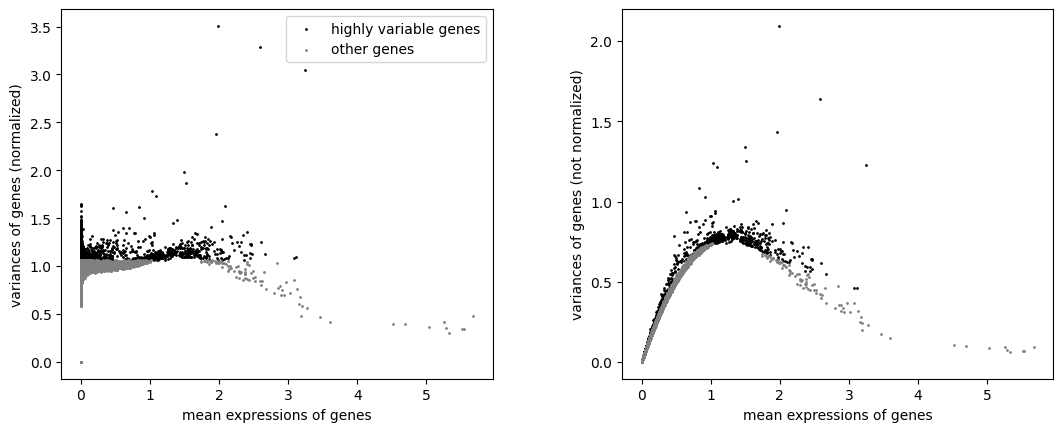

In [5]:
sc.pl.highly_variable_genes(adata)

In [6]:
#Because normalization and logarithmic operations were performed, which had an impact on gene expression, HVG was assigned to the new data
adata_hvg = adata_[:, adata.var.highly_variable]
adata_hvg

View of AnnData object with n_obs × n_vars = 3460 × 3000
    obs: 'in_tissue', 'array_row', 'array_col', 'Region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [7]:
adata_hvg.X

<3460x3000 sparse matrix of type '<class 'numpy.float32'>'
	with 1448673 stored elements in Compressed Sparse Row format>

/home/workspace2/zhaofangyuan/anaconda3/envs/stagate_pyg/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


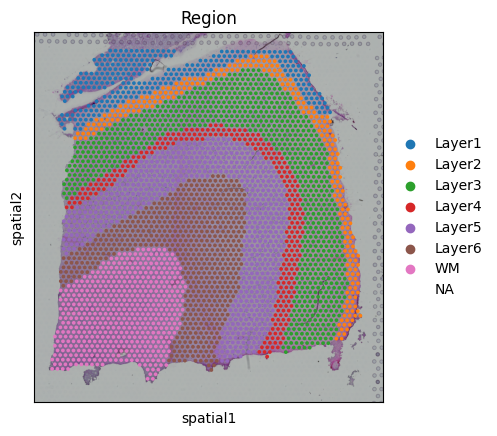

In [8]:
sc.pl.spatial(adata_hvg, img_key="hires", color="Region")

In [9]:
adata_hvg.write_h5ad(f'./{dataname}_hvg.h5ad')

In [10]:
# sc.pl.highest_expr_genes(adata, n_top=20, )